In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv("winequality.csv")
df=df.drop(["type"],axis=1)

In [18]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [25]:
df["volatile acidity"].median()

0.29

In [41]:
df1=df.fillna(method="ffill")

In [66]:
X=df1
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
y= df1["quality"]
y.sample(5)

4354    6
5546    7
3883    6
818     5
1526    6
Name: quality, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [98]:
def scores_knn(X,y,start,stop,step):

    # Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    # Lista de Diccionarios

    scores_para_df = []

    # range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
    # hasta el 40 en saltos de a 5. (Start,Stop,Step)

    for i in range(start,stop,step):
        # En cada iteración instanciamos el modelo con un hiperparámetro distinto

        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV

        kf = KFold(n_splits=10, shuffle=True, random_state=10)

        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.

        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardo cada uno en la lista de diccionarios

        scores_para_df.append(dict_row_score)

    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [100]:
df_score=scores_knn(X_train,y_train,1,21,1)


In [101]:
df_score

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.937606,0.012873,1,0.924733,0.950478
1,0.917897,0.010231,2,0.907666,0.928128
2,0.924673,0.009125,3,0.915547,0.933798
3,0.919950,0.009143,4,0.910807,0.929093
4,0.920564,0.008927,5,0.911636,0.929491
5,0.916870,0.010734,6,0.906135,0.927604
6,0.916253,0.011034,7,0.905219,0.927286
7,0.907224,0.005873,8,0.901351,0.913098
8,0.908663,0.009496,9,0.899167,0.918159
9,0.903530,0.008471,10,0.895059,0.912001


In [85]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)


In [86]:
scores_para_df = []
for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores), 'n_neighbours':i}
    scores_para_df.append(dict_row_score)

In [88]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.933705,0.008434,1,0.925271,0.942139
1,0.913179,0.006492,2,0.906686,0.919671
2,0.922007,0.010966,3,0.911041,0.932973
3,0.917078,0.012052,4,0.905026,0.929130
4,0.919131,0.013807,5,0.905324,0.932937


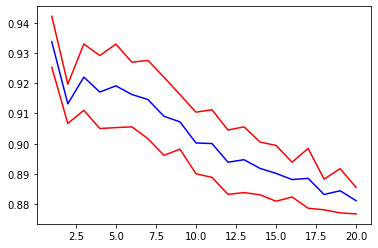

In [102]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [90]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.933705,0.008434,1,0.925271,0.942139


In [91]:
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

media: -2.3334736806571434e-17
desvio: 1.0


In [92]:
scores_para_df_standar = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [93]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,score_medio,score_std,n_neighbours
0,0.933705,0.008434,1
1,0.913179,0.006492,2
2,0.922007,0.010966,3
3,0.917078,0.012052,4
4,0.919131,0.013807,5


In [94]:
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']
df_scores_standar.head()

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,0.933705,0.008434,1,0.942139,0.925271
1,0.913179,0.006492,2,0.919671,0.906686
2,0.922007,0.010966,3,0.932973,0.911041
3,0.917078,0.012052,4,0.929130,0.905026
4,0.919131,0.013807,5,0.932937,0.905324


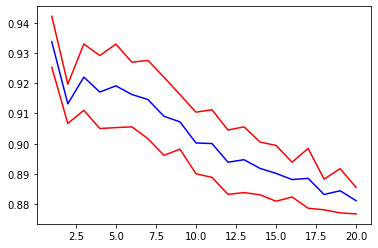

In [95]:
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [96]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,0.933705,0.008434,1,0.942139,0.925271


In [97]:
best_k = df_scores_standar.loc[df_scores_standar.score_medio ==\
                               df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k

1